In [1]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.svm import SVR
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold

In [2]:
# Read the data
data = pd.read_csv('ml_data_variable.csv')

# Extract the independent variables (X) and dependent variable (y)
X = data[['COAL, Thousand Short Tons', 'NATURALGAS, Billion Cubic Feet', 'ELECTRICITY, Million Kilowatthours',
          'PETRO_INDUSTRIAL, Thousand Barrels per Day', 'PETRO_RESIDENTIAL, Thousand Barrels per Day',
          'PETRO_COMMERCIAL, Thousand Barrels per Day', 'PETRO_TRANSPORTATION, Thousand Barrels per Day',
          'PETRO_ELECTRICPOWER, Thousand Barrels per Day']]

y = data['CO2, Million Metric Tons']

# Shuffle data
X, y = shuffle(X, y, random_state=42)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


R² (Training): 0.9805122986273803
R² (Testing): 0.98
Mean Absolute Error: 5.38
Mean Squared Error: 56.48
Root Mean Squared Error: 7.52
Best hyperparameters: {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}


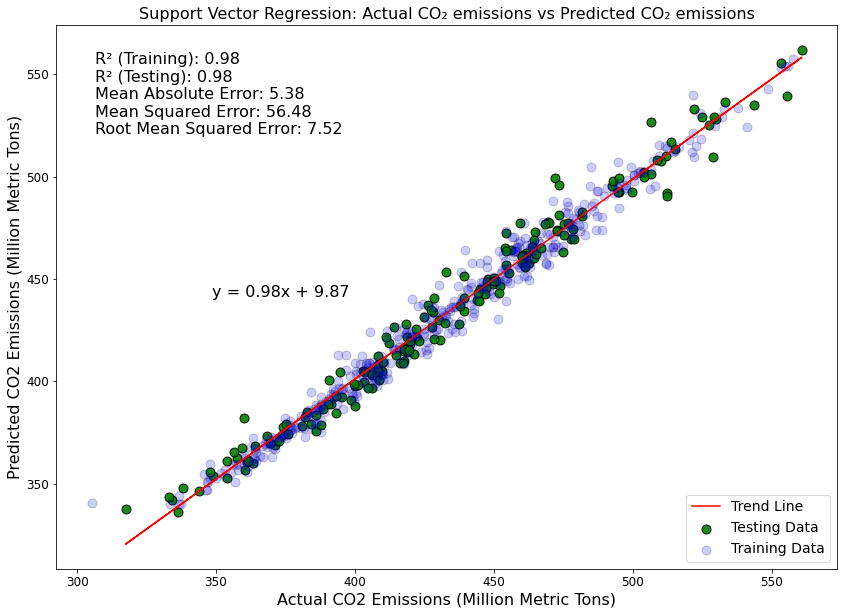

"\nOverfitting: SVM models are prone to overfitting, especially when the data is noisy or when the number of features is high compared to the number of samples. Overfitting can lead to poor generalization and low R2 values. Regularization techniques such as adjusting the regularization parameter (C) or using techniques like cross-validation can help mitigate overfitting.\n\nIncorrect Model Parameters: The performance of an SVM model can be sensitive to the choice of hyperparameters such as the kernel type, regularization parameter (C), and kernel coefficient (gamma). Suboptimal parameter settings can result in poor model performance and low R2 values. It is important to carefully tune the hyperparameters to find the optimal configuration for your data.\n\nOutliers or Noise: Outliers or noisy data points can adversely affect the performance of an SVM model. Consider identifying and handling outliers appropriately, either by removing them or applying outlier treatment techniques, to impr

In [3]:

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Feature selection using RFE with cross-validation
svr_model = SVR(kernel='linear')  # We will use the linear kernel for feature selection
rfe = RFE(estimator=svr_model, n_features_to_select=4)
X_train_selected = rfe.fit_transform(X_train_scaled, y_train)
X_test_selected = rfe.transform(X_test_scaled)

# Perform hyperparameter tuning using GridSearchCV with RBF kernel
parameters = {
    'kernel': ['rbf'],
    'C': [1, 10, 100],
    'gamma': [0.1, 1, 10]
}

svr_model = GridSearchCV(SVR(), parameters, cv=3)
svr_model.fit(X_train_selected, y_train)

# Get the best SVR model from the grid search
best_svr_model = svr_model.best_estimator_

# Predict using the best model on training data
y_train_pred = best_svr_model.predict(X_train_selected)

# Predict using the best model on testing data
y_test_pred = best_svr_model.predict(X_test_selected)

# Evaluate the model on training data
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
mae = mean_absolute_error(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
rmse = mean_squared_error(y_test, y_test_pred, squared=False)

# Print results
print("R² (Training):", r2_train)
print("R² (Testing):", format(r2_test, ".2f"))
print("Mean Absolute Error:", format(mae, ".2f"))
print("Mean Squared Error:", format(mse, ".2f"))
print("Root Mean Squared Error:", format(rmse, ".2f"))

print("Best hyperparameters:", svr_model.best_params_)


plt.figure(figsize=(14, 10)) 
# Scatter plot with trend line
plt.scatter(y_test, y_test_pred, label='Testing Data', color='green', alpha=0.9, s=80, edgecolors='black')
plt.scatter(y_train, y_train_pred, label='Training Data', color='blue', alpha=0.2, s=80, edgecolors='black')
plt.xlabel('Actual CO2 Emissions (Million Metric Tons)', fontsize=16)
plt.ylabel('Predicted CO2 Emissions (Million Metric Tons)', fontsize=16)
plt.title('Support Vector Regression: Actual CO₂ emissions vs Predicted CO₂ emissions', fontsize=16)

# Perform linear regression to get the line equation
slope, intercept = np.polyfit(y_test, y_test_pred, 1)

# Add the equation as text on the plot
equation = f'y = {slope:.2f}x + {intercept:.2f}'

# Plot trend line for testing data
test_trendline = np.polyfit(y_test, y_test_pred, 1)
plt.plot(y_test, np.polyval(test_trendline, y_test), color='red', label='Trend Line')


# Annotate statistical parameters on the plot
textstr = f'R² (Training): {format(r2_train, ".2f")}\nR² (Testing): {format(r2_test, ".2f")}\nMean Absolute Error: {format(mae, ".2f")}\nMean Squared Error: {format(mse, ".2f")}\nRoot Mean Squared Error: {format(rmse, ".2f")}'
plt.text(0.05, 0.95, textstr, transform=plt.gca().transAxes, verticalalignment='top', fontsize=16)

# Adjust the position of the trendline function text annotation
plt.text(0.2, 0.5, equation, transform=plt.gca().transAxes, fontsize=16)

plt.legend(loc='lower right', fontsize=14)
plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=12)
plt.savefig('Support Vector Regression Actual CO₂ emissions vs Predicted CO₂ emissions.jpg')
plt.show()

'''
Overfitting: SVM models are prone to overfitting, especially when the data is noisy or when the number of features is high compared to the number of samples. Overfitting can lead to poor generalization and low R2 values. Regularization techniques such as adjusting the regularization parameter (C) or using techniques like cross-validation can help mitigate overfitting.

Incorrect Model Parameters: The performance of an SVM model can be sensitive to the choice of hyperparameters such as the kernel type, regularization parameter (C), and kernel coefficient (gamma). Suboptimal parameter settings can result in poor model performance and low R2 values. It is important to carefully tune the hyperparameters to find the optimal configuration for your data.

Outliers or Noise: Outliers or noisy data points can adversely affect the performance of an SVM model. Consider identifying and handling outliers appropriately, either by removing them or applying outlier treatment techniques, to improve the R2 value.

Insufficient Data: SVM models may require a relatively large amount of data to generalize well. If you have a small dataset, the model may struggle to capture the underlying patterns accurately. Gathering more data or using techniques such as data augmentation can help address this issue.

Data Scaling: SVM models are sensitive to the scale of the features. If the features have different scales, it can impact the model's performance and R2 value. Consider applying feature scaling techniques, such as standardization or normalization, to ensure that all features are on a similar scale.

'''

In [4]:
# Perform hyperparameter tuning using GridSearchCV with RBF kernel
parameters = {
    'kernel': ['rbf'],
    'C': [1, 10, 100],
    'gamma': [0.1, 1, 10]
}

svr_model = GridSearchCV(SVR(), parameters, cv=3)
svr_model.fit(X_train_selected, y_train)

best_svr_model = svr_model.best_estimator_
best_svr_model.fit(X_train_selected, y_train)

# Perform 5-fold cross-validation
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Calculate R2 scores using cross-validation
cv_r2_scores = cross_val_score(best_svr_model, X_train_selected, y_train, cv=cv, scoring='r2')

# Calculate MSE scores using cross-validation
cv_mse_scores = -cross_val_score(best_svr_model, X_train_selected, y_train, cv=cv, scoring='neg_mean_squared_error')

# Calculate MAE scores using cross-validation
cv_mae_scores = -cross_val_score(best_svr_model, X_train_selected, y_train, cv=cv, scoring='neg_mean_absolute_error')

# Calculate RMSE scores using cross-validation
cv_rmse_scores = np.sqrt(cv_mse_scores)

# Print cross-validation results
print("Cross-Validation R² Scores:", cv_r2_scores)
print("Mean R² Score:", np.mean(cv_r2_scores))
print("Cross-Validation MSE Scores:", cv_mse_scores)
print("Mean MSE Score:", np.mean(cv_mse_scores))
#print("Cross-Validation MAE Scores:", cv_mae_scores)
#print("Mean MAE Score:", np.mean(cv_mae_scores))
#print("Cross-Validation RMSE Scores:", cv_rmse_scores)
#print("Mean RMSE Score:", np.mean(cv_rmse_scores))



Cross-Validation R² Scores: [0.97753501 0.98133312 0.97284849 0.97787274 0.96472626]
Mean R² Score: 0.9748631258507265
Cross-Validation MSE Scores: [54.27513966 41.65304157 51.53107927 51.72395722 93.40411002]
Mean MSE Score: 58.51746554904325


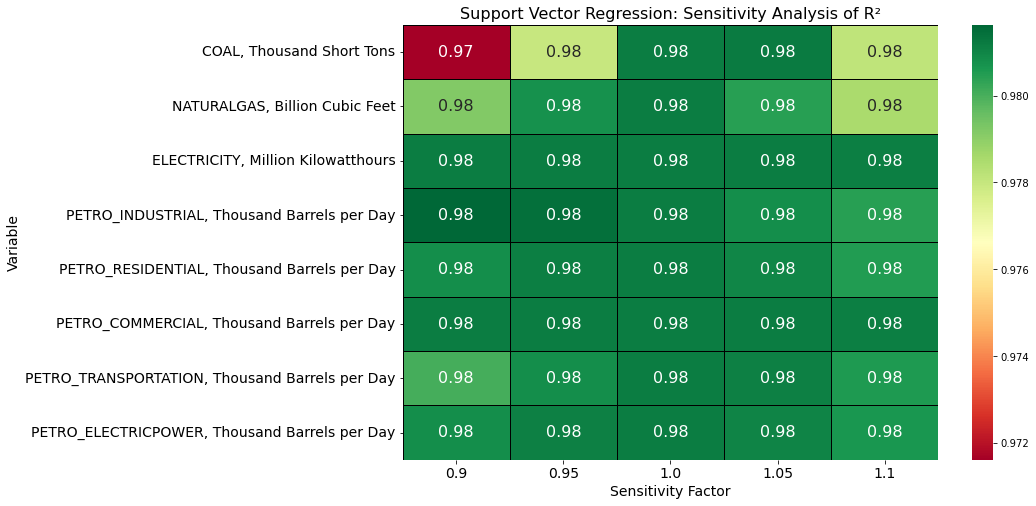

Sensitivity Analysis Results:
Sensitivity Analysis for variable: COAL, Thousand Short Tons
Sensitivity: 0.9, R-squared score: 0.9716162880142842
Sensitivity: 0.95, R-squared score: 0.9779732735973484
Sensitivity: 1.0, R-squared score: 0.9811770712981553
Sensitivity: 1.05, R-squared score: 0.981227681116705
Sensitivity: 1.1, R-squared score: 0.9781251030529974

Sensitivity Analysis for variable: NATURALGAS, Billion Cubic Feet
Sensitivity: 0.9, R-squared score: 0.9791620601024211
Sensitivity: 0.95, R-squared score: 0.9807560030312769
Sensitivity: 1.0, R-squared score: 0.9811770712981553
Sensitivity: 1.05, R-squared score: 0.9804252649030566
Sensitivity: 1.1, R-squared score: 0.9785005838459806

Sensitivity Analysis for variable: ELECTRICITY, Million Kilowatthours
Sensitivity: 0.9, R-squared score: 0.9811871115390736
Sensitivity: 0.95, R-squared score: 0.9811835359768177
Sensitivity: 1.0, R-squared score: 0.9811770712981553
Sensitivity: 1.05, R-squared score: 0.9811677175030865
Sensitivit

In [5]:
# Read the data
data = pd.read_csv('ml_data_variable.csv')

# Extract the independent variables (X) and dependent variable (y)
X = data[['COAL, Thousand Short Tons', 'NATURALGAS, Billion Cubic Feet', 'ELECTRICITY, Million Kilowatthours',
          'PETRO_INDUSTRIAL, Thousand Barrels per Day', 'PETRO_RESIDENTIAL, Thousand Barrels per Day',
          'PETRO_COMMERCIAL, Thousand Barrels per Day', 'PETRO_TRANSPORTATION, Thousand Barrels per Day',
          'PETRO_ELECTRICPOWER, Thousand Barrels per Day']]

y = data['CO2, Million Metric Tons']

# Shuffle and split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit the SVR model
svr_model = SVR(kernel='linear')
svr_model.fit(X_train_scaled, y_train)

# Define the variables to analyze for sensitivity
variables_to_analyze = ['COAL, Thousand Short Tons', 'NATURALGAS, Billion Cubic Feet', 'ELECTRICITY, Million Kilowatthours',
                        'PETRO_INDUSTRIAL, Thousand Barrels per Day', 'PETRO_RESIDENTIAL, Thousand Barrels per Day',
                        'PETRO_COMMERCIAL, Thousand Barrels per Day', 'PETRO_TRANSPORTATION, Thousand Barrels per Day',
                        'PETRO_ELECTRICPOWER, Thousand Barrels per Day']

# Initialize a dictionary to store sensitivity analysis results
sensitivity_results = {}

# Iterate over the variables for sensitivity analysis
for variable_name in variables_to_analyze:
    # Get the original values of the selected variable
    original_values = X_test_scaled[:, X.columns.get_loc(variable_name)].copy()

    # Initialize a list to store sensitivity analysis results for the current variable
    variable_sensitivity_results = []

    # Iterate over different sensitivities (e.g., increase by 10%)
    for sensitivity in [0.9, 0.95, 1.0, 1.05, 1.1]:
        # Modify the values of the selected variable
        modified_values = original_values * sensitivity
        X_test_modified = X_test_scaled.copy()
        X_test_modified[:, X.columns.get_loc(variable_name)] = modified_values

        # Make predictions using the modified dataset
        y_pred_modified = svr_model.predict(X_test_modified)

        # Calculate the R-squared score for the modified predictions
        r2_modified = r2_score(y_test, y_pred_modified)

        # Store the sensitivity analysis results
        variable_sensitivity_results.append(r2_modified)

    # Store the sensitivity analysis results for the current variable in the dictionary
    sensitivity_results[variable_name] = variable_sensitivity_results

# Create a DataFrame to store the sensitivity analysis results
sensitivity_df = pd.DataFrame.from_dict(sensitivity_results, orient='index', columns=[0.9, 0.95, 1.0, 1.05, 1.1])

# Create a heatmap to visualize the sensitivity analysis results
plt.figure(figsize=(12, 8))  # Adjust the figure size if needed

sns.heatmap(sensitivity_df, cmap='RdYlGn', annot=True, fmt='.2f', annot_kws={'fontsize': 16},
            xticklabels=[0.9, 0.95, 1.0, 1.05, 1.1], yticklabels=variables_to_analyze,
            linewidths=0.5, linecolor='black')

plt.xlabel('Sensitivity Factor', fontsize=14)
plt.ylabel('Variable', fontsize=14)
plt.title('Support Vector Regression: Sensitivity Analysis of R²', fontsize=16)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.savefig('SVR_Sensitivity_Analysis.jpg', dpi=300, bbox_inches='tight')
plt.show()

# Print the sensitivity analysis results
print("Sensitivity Analysis Results:")
for variable_name, sensitivity_scores in sensitivity_results.items():
    print(f"Sensitivity Analysis for variable: {variable_name}")
    for i, sensitivity in enumerate([0.9, 0.95, 1.0, 1.05, 1.1]):
        print(f"Sensitivity: {sensitivity}, R-squared score: {sensitivity_scores[i]}")
    print()